# Logistic Regression

Logistic Regression is a binary classification method. The key idea is learning a mapping from a feature vector to a probability, a number between $0$ and $1$. It is similar to least-squares in the sense that (apart from some extreme cases) it has a unique solution.

Suppose, for a set of objects $X$, each denoted by the feature vector $x_i \in \mathbb{R}^D$, we are given the answer to some true-false question, such as 'is object $i$ of class $c$?'. This answer is denoted by $y_i \in \{0, 1\}$. We are given a dataset of feature vectors $x_i$ along with the corresponding 'labels' $y_i$. For $i=1\dots N$

$$(y_i, x_i)$$

The model is 
$$
\Pr\{y_i = 1\} = \sigma(x_i^\top w)
$$
Here,
$\sigma(x)$ is the sigmoid function defined as
\begin{eqnarray}
\sigma(x) & = & \frac{1}{1+e^{-x}}
\end{eqnarray}

This is a generative model. To understand logistic regression as a generative model, consider the following metaphor: assume that for each data instance $x_i$, we select a biased coin with probability $p(y_i = 1| w, x) = \pi_i = \sigma(w^\top x_i)$, throw the coin and label the data item with class $y_i$ accordingly. 


Mathematically, we assume that each label $y_i$ is drawn from a Bernoulli distribution. That is: 
\begin{eqnarray}
\pi_i & = & \sigma(x_i^\top w) \\
y_i & \sim &\mathcal{BE}(\pi)
\end{eqnarray}

Here, we think of a biased coin with two sides denoted as $1$ and $0$ with probability of side $1$ as $\pi$, and consequently the probability of side $0$ with $1-\pi$. We denote the outcome of the coin toss with the random variable $y$. We write the probability as $p(y = 1) = \pi$ and probability of heads is $p(y = 0) = 1-\pi$. More compactly, the probability of the outcome of a toss, provided we know $\pi$, is written as
\begin{eqnarray}
p(y|\pi) = \pi^y(1-\pi)^y
\end{eqnarray}

In logistic regression, we are given a dataset of form
\begin{eqnarray}
X & = &  \begin{pmatrix}
  x_{1,1} & x_{1,2} & \dots & x_{1,D} \\
  x_{2,1} & x_{2,2} & \dots & x_{2,D} \\
  \vdots & \vdots & \vdots & \vdots  \\
  x_{i,1} & x_{i,2} & \dots & x_{i,D}  \\
  \vdots & \vdots & \vdots & \vdots  \\
  x_{N,1} & x_{N,2} & \dots & x_{N,D} \\
\end{pmatrix} = 
\begin{pmatrix}
x_1^\top \\
x_2^\top \\
\dots \\
x_i^\top \\
\dots \\
x_N^\top
\end{pmatrix} 
\\
{y} & = & \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_i \\
\vdots \\
y_N
\end{pmatrix}
\end{eqnarray}
where $x_{i,j}$ denotes the $j$'th feature of the $i$'th data point. It is customary, to set a column entirely to $1$, for example $x_{i,D}=1$ for all $i$. This 'feature' is artificially added to the dataset to allow a slightly more flexible model. The $y_i$ denote the target class label of the
$i$'th object. In logistic regression, we consider the case of binary classification where $y_i \in \{0,1\}$. It is possible to use other encodings such as $y_i \in \{-1,1\}$; the derivations are similar.




### Properties of the sigmoid function
Note that

\begin{eqnarray}
\sigma(x) & = & \frac{e^x}{(1+e^{-x})e^x} = \frac{e^x}{1+e^{x}} \\
1 - \sigma(x) & = & 1 - \frac{e^x}{1+e^{x}} = \frac{1+e^{x} - e^x}{1+e^{x}} = \frac{1}{1+e^{x}}
\end{eqnarray}

\begin{eqnarray}
\sigma'(x) & = & \frac{e^x(1+e^{x}) - e^{x} e^x}{(1+e^{x})^2} = \frac{e^x}{1+e^{x}}\frac{1}{1+e^{x}} = \sigma(x) (1-\sigma(x))
\end{eqnarray}

\begin{eqnarray}
\log \sigma(x) & = & -\log(1+e^{-x}) = x - \log(1+e^{x}) \\
\log(1 - \sigma(x)) & = &  -\log({1+e^{x}})
\end{eqnarray}




Exercise: Plot the sigmoid function and its derivative.

### Learning the parameters

The likelihood of the observations, that is the probability of observing the class sequence is
\begin{eqnarray}
p(y_1, y_2, \dots, y_N|w, x_1, x_2, \dots, x_N ) &=& \left(\prod_{i : y_i=1} \sigma(w^\top x_i) \right) \left(\prod_{i : y_i=0}(1- \sigma(w^\top x_i)) \right)
\end{eqnarray}
Here, the left product is the expression for examples from class $1$ and the right product is for examples from class $0$.
We will look for the particular setting of the weight vector, the so called maximum likelihood solution, denoted by $w^*$.
\begin{eqnarray}
w^* & = & \arg\max_{w} {\cal L}(w)
\end{eqnarray}
where the loglikelihood function
\begin{eqnarray}
{\cal L}(w) & = & \log p(y_1, y_2, \dots, y_N|w, x_1, x_2, \dots, x_N ) \\
& = & \sum_{i : y_i=1} \log \sigma(w^\top x_i) + \sum_{i : y_i=0} \log (1- \sigma(w^\top x_i)) \\
& = & \sum_{i : y_i=1} w^\top x_i - \sum_{i : y_i=1} \log(1+e^{w^\top x_i}) - \sum_{i : y_i=0}\log({1+e^{w^\top x_i}}) \\
& = & \sum_i y_i w^\top x_i - \sum_{i} \log(1+e^{w^\top x_i}) \\
& = & y^\top X w - \mathbf{1}^\top logsumexp(0, X w)
\end{eqnarray}

Unlike the least-squares problem, an expression for direct evaluation of $w^*$ is not known so we need to resort to numerical optimization. 

### Optimization via gradient ascent

One way for
optimization is gradient ascent
\begin{eqnarray}
w^{(\tau)} & \leftarrow & w^{(\tau-1)} + \eta \nabla_w {\cal L}
\end{eqnarray}
where
\begin{eqnarray}
\nabla_w {\cal L} & = &
\begin{pmatrix}
{\partial {\cal L}}/{\partial w_1} \\
{\partial {\cal L}}/{\partial w_2} \\
\vdots \\
{\partial {\cal L}}/{\partial w_{D}}
\end{pmatrix}
\end{eqnarray}
is the gradient vector.

#### Evaluating the gradient
The partial derivative of the loglikelihood with respect to the $k$'th entry of the weight vector is given by the chain rule as
\begin{eqnarray}
\frac{\partial{\cal L}}{\partial w_k} & = & \frac{\partial{\cal L}}{\partial \sigma(u)} \frac{\partial \sigma(u)}{\partial u} \frac{\partial u}{\partial w_k}
\end{eqnarray}

\begin{eqnarray}
{\cal L}(w) & = & \sum_{i : y_i=1} \log \sigma(w^\top x_i) + \sum_{i : y_i=0} \log (1- \sigma(w^\top x_i))
\end{eqnarray}

\begin{eqnarray}
\frac{\partial{\cal L}(\sigma)}{\partial \sigma} & = &  \sum_{i : y_i=1} \frac{1}{\sigma(w^\top x_i)} - \sum_{i : y_i=0} \frac{1}{1- \sigma(w^\top x_i)}
\end{eqnarray}

\begin{eqnarray}
\frac{\partial \sigma(u)}{\partial u} & = & \sigma(w^\top x_i) (1-\sigma(w^\top x_i))
\end{eqnarray}

\begin{eqnarray}
\frac{\partial w^\top x_i }{\partial w_k} & = & x_{i,k}
\end{eqnarray}


So the gradient is
\begin{eqnarray}
\frac{\partial{\cal L}}{\partial w_k} & = & \sum_{i : y_i=1} \frac{\sigma(w^\top x_i) (1-\sigma(w^\top x_i))}{\sigma(w^\top x_i)} x_{i,k} - \sum_{i : y_i=0} \frac{\sigma(w^\top x_i) (1-\sigma(w^\top x_i))}{1- \sigma(w^\top x_i)} x_{i,k} \\
& = & \sum_{i : y_i=1} {(1-\sigma(w^\top x_i))} x_{i,k} - \sum_{i : y_i=0} {\sigma(w^\top x_i)} x_{i,k}
\end{eqnarray}

We can write this expression more compactly by noting
\begin{eqnarray}
\frac{\partial{\cal L}}{\partial w_k} & = & \sum_{i : y_i=1} {(\underbrace{1}_{y_i}-\sigma(w^\top x_i))} x_{i,k} + \sum_{i : y_i=0} {(\underbrace{0}_{y_i} - \sigma(w^\top x_i))} x_{i,k} \\
& = & \sum_i (y_i - \sigma(w^\top x_i)) x_{i,k}
\end{eqnarray}

The update rule is
\begin{eqnarray}
w^{(\tau)} = w^{(\tau-1)} + \eta X^\top (y-\sigma(X w))
\end{eqnarray}




In [1]:
%matplotlib inline
from cvxpy import *
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

/Users/cemgil/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [25]:
x = np.matrix('[-2,1; -1,2; 1,5; -1,1; -3,-2; 1,1] ')
y = np.matrix('[0,0,1,0,0,1]').T


N = x.shape[0]
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
X = np.hstack((x, np.ones((N,1)) ))

K = X.shape[1]
Ke = 0

z = np.zeros((N,1))

print(y)
print(X)

[[0]
 [0]
 [1]
 [0]
 [0]
 [1]]
[[-2.  1.  1.]
 [-1.  2.  1.]
 [ 1.  5.  1.]
 [-1.  1.  1.]
 [-3. -2.  1.]
 [ 1.  1.  1.]]


In [89]:
N = 1000
K = 10
Ke = 40-K

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.matrix(np.random.randn(N, K))
w_true = np.random.randn(K,1)

p = sigmoid(x*w_true)
u = np.random.rand(N,1)
y = (u < p)
y = y.astype(np.float64)

#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
X = np.hstack((x, np.random.randn(N, Ke )))




[[  4.40983335e-02]
 [ -3.99878834e-11]
 [ -4.89025643e-11]
 [  2.80208513e-12]
 [  8.99384909e-02]
 [  2.48151990e-01]
 [  1.00411325e+00]
 [ -6.49613096e-02]
 [  1.14700040e+00]
 [ -6.10505750e-01]
 [  1.09795546e-10]
 [ -1.01054452e-11]
 [  6.10728067e-11]
 [ -2.78667789e-11]
 [  3.11769935e-11]
 [  1.54248866e-12]
 [ -1.64127375e-10]
 [  6.07470106e-11]
 [ -7.33071236e-11]
 [ -2.65350325e-12]
 [  6.54192363e-11]
 [ -3.76599877e-10]
 [  1.60127872e-11]
 [  1.21984759e-10]
 [ -3.28280038e-11]
 [ -5.44375293e-12]
 [ -2.35710693e-11]
 [ -1.26861576e-11]
 [  1.26534640e-11]
 [ -5.25187409e-11]
 [ -1.33941329e-11]
 [ -3.14596819e-09]
 [ -4.26032415e-10]
 [  3.51397512e-11]
 [ -1.38935273e-10]
 [ -9.18761500e-13]
 [ -6.34084551e-11]
 [ -1.41931589e-10]
 [  4.54740315e-12]
 [  1.54700892e-02]]


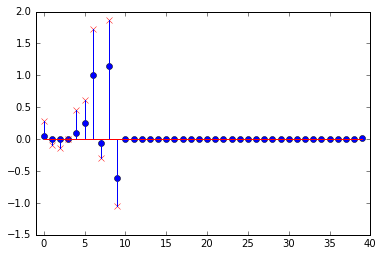

In [94]:
z = np.zeros((N,1))
# Construct the problem.
w = Variable(K+Ke)
objective = Minimize(25.5*norm(w, 1) -y.T*X*w + sum_entries(log_sum_exp(hstack(z, X*w),axis=1)))
#constraints = [0 <= x, x <= 10]
#prob = Problem(objective, constraints)
prob = Problem(objective)

# The optimal objective is returned by prob.solve().
result = prob.solve()
# The optimal value for x is stored in x.value.
print(w.value)
# The optimal Lagrange multiplier for a constraint
# is stored in constraint.dual_value.
#print(constraints[0].dual_value)

#plt.show()

plt.stem(w.value)
plt.stem(w_true,markerfmt='xr')

plt.gca().set_xlim((-1, K+Ke))
plt.show()

